In [3]:
##First, we'll read the audio file and process it step by step.

##I was inspired when I intially learned about unsupervised learning in a scholarship program - and realized that ASR is the best example of that.
##When I digged deeper, I realized how just looking at the machine learning was just one part of it - the physics and math of it was even 
##more exciting to learn. So, I wanted to try to make a project that would map the steps of sound to text in a detailed way.

##my only regret is that I was unable to expand on the fourier transforms aspect as much as I wanted to... :(


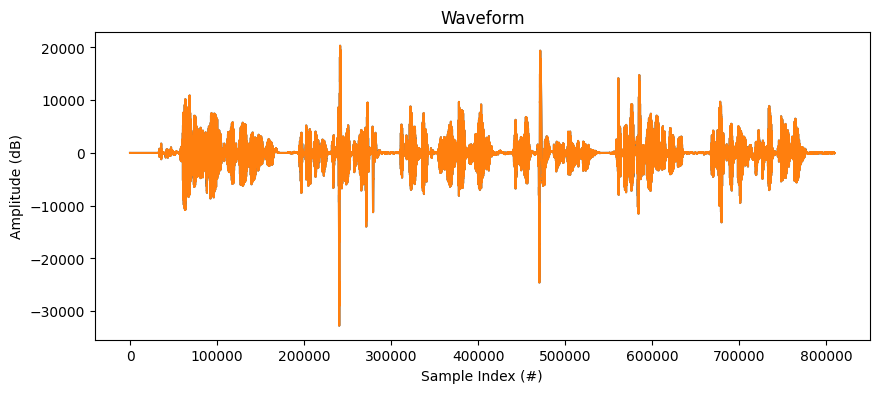

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import librosa
import librosa.display
import speech_recognition as sr

# Step 1: Read Audio File
audio_file = '/Users/aditijain/SPEECH VISUALIZATION/harvard.wav'

# Read the audio file
sampling_rate, audio_data = wavfile.read(audio_file)

# Display the waveform
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title('Waveform')
plt.xlabel('Sample Index (#)')
plt.ylabel('Amplitude (dB)')
plt.show()


In [2]:
pip install simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_wav("/Users/aditijain/SPEECH VISUALIZATION/harvard.wav")
play(sound)

In [ ]:
##The Nyquist theorem states that to accurately sample a signal, it must be sampled at least twice its maximum frequency.

In [ ]:
nyquist_freq = sampling_rate / 2
print(f"Nyquist Frequency: {nyquist_freq} Hz")

In [ ]:
#The Fourier Transform is used to convert the time-domain signal into the frequency domain.

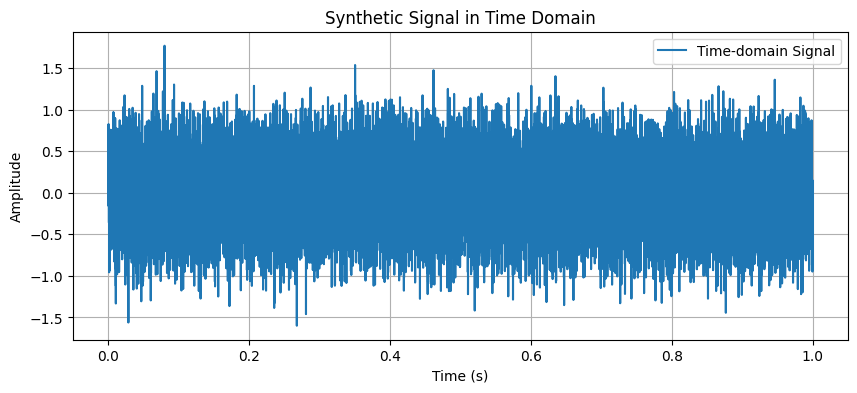

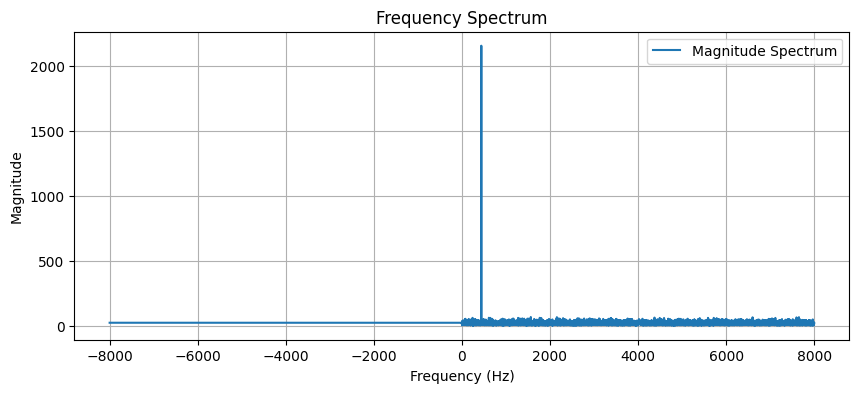

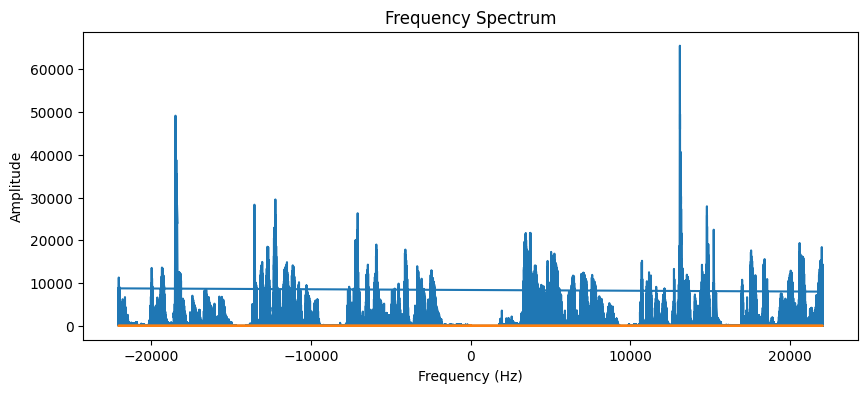

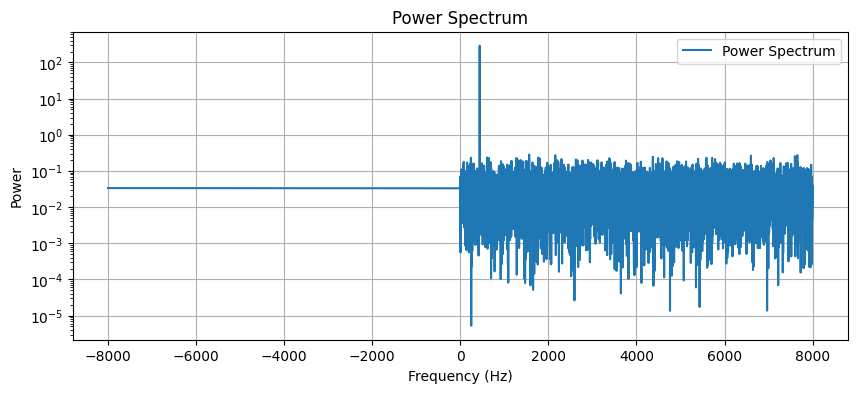

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import get_window
from scipy.fftpack import dct
import librosa
import librosa.display

# Step 1: Generate a synthetic signal (sine wave + noise)
fs = 16000  # Sampling frequency (16 kHz)
duration = 1.0  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = 0.5 * np.sin(2 * np.pi * 440 * t) + 0.3 * np.random.normal(0, 1, t.shape[0])

# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Time-domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Synthetic Signal in Time Domain")
plt.legend()
plt.grid()
plt.show()

# Step 2: Apply FFT and visualize
N = len(signal)  # Number of samples
window = get_window("hamming", N)  # Hamming window
windowed_signal = signal * window

# Compute FFT (adjusted to include Nyquist frequency)
fft_result = fft(windowed_signal)
frequencies = np.fft.fftfreq(N, d=1 / fs)  # Frequency bins
magnitude = np.abs(fft_result)[:N // 2 + 1]  # Include Nyquist bin
frequencies = frequencies[:N // 2 + 1]

# Plot the magnitude spect (rum
plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude, label="Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.grid()
plt.show()

from scipy.fftpack import fft

# Perform Fourier Transform
freqs = np.fft.fftfreq(len(audio_data), d=1/sampling_rate)
fft_values = fft(audio_data)

# Plot Frequency Spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(fft_values))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Step 3: Spectral Analysis (Power Spectrum)
power_spectrum = (magnitude ** 2) / N
plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, power_spectrum, label="Power Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Power Spectrum")
plt.legend()
plt.grid()
plt.show()



In [6]:
#A spectrogram shows how the spectrum of frequencies evolves over time.

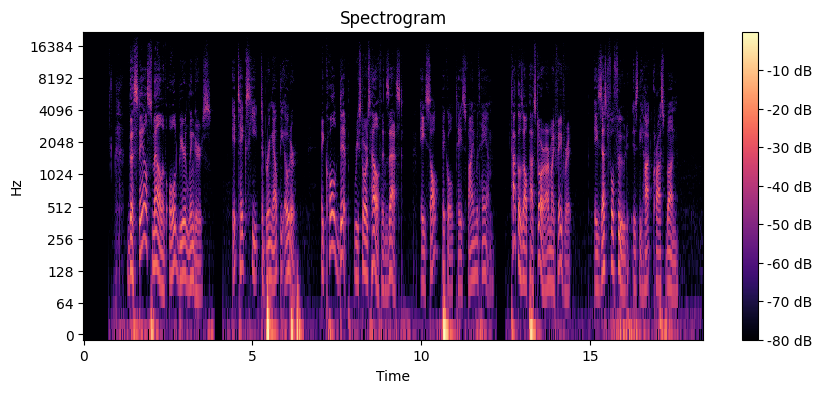

In [7]:
# Compute and plot spectrogram
y, sr = librosa.load(audio_file, sr=None)
plt.figure(figsize=(10, 4))
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.show()

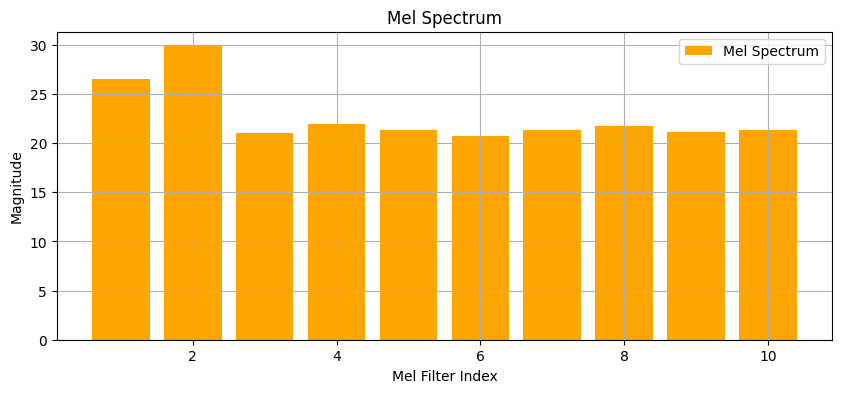

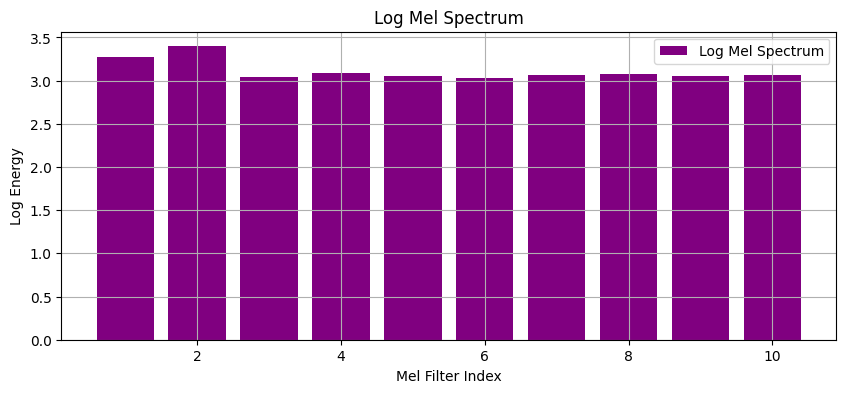

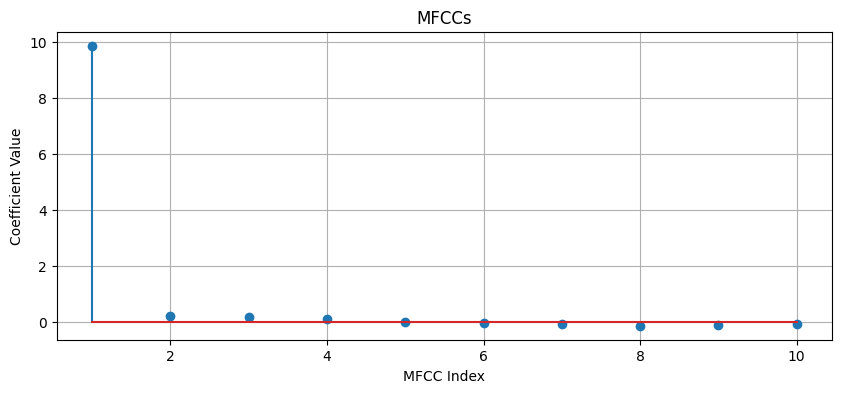

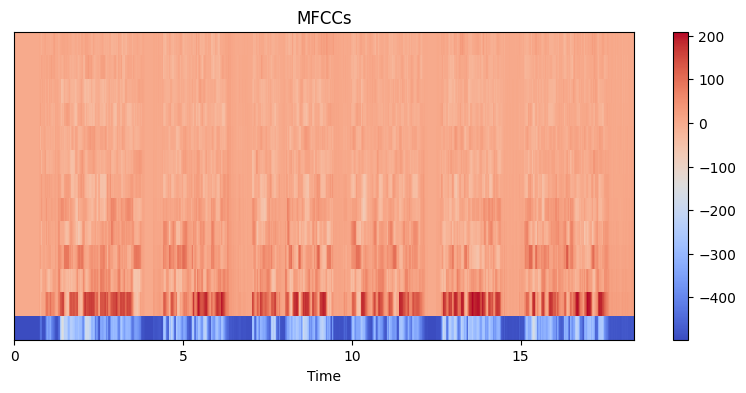

Spectral Centroid 3243.3595695974536
Zero Crossing Rate 0.06870999920986094


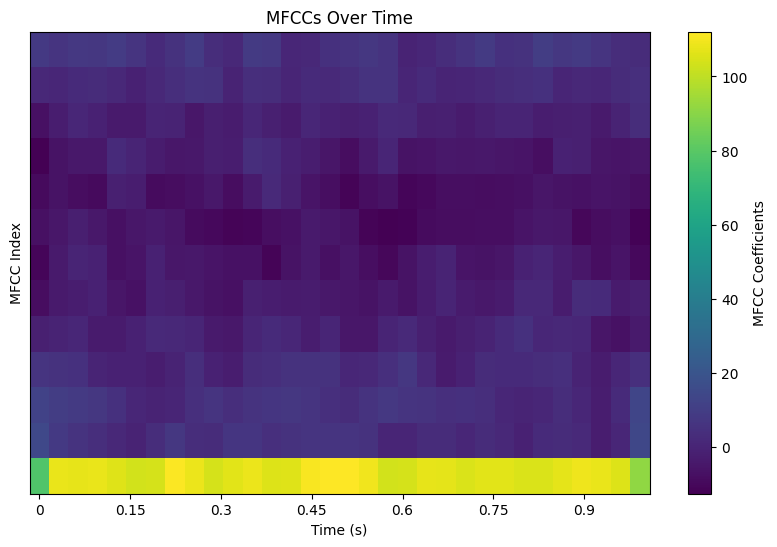

In [8]:
# Adjust Mel filters for the single-sided spectrum (n_fft determines full FFT length)
mel_filters = librosa.filters.mel(sr=fs, n_fft=N, n_mels=10, fmin=0, fmax=fs / 2)

# Apply Mel filter banks to the magnitude spectrum
mel_spectrum = np.dot(mel_filters, magnitude)  # Ensure alignment with FFT bins


# Visualize the Mel spectrum
plt.figure(figsize=(10, 4))
plt.bar(range(1, 11), mel_spectrum, color="orange", label="Mel Spectrum")
plt.xlabel("Mel Filter Index")
plt.ylabel("Magnitude")
plt.title("Mel Spectrum")
plt.legend()
plt.grid()
plt.show()

# Step 5: Log Mel Energies
log_mel_spectrum = np.log(mel_spectrum + 1e-9)  # Avoid log(0)
plt.figure(figsize=(10, 4))
plt.bar(range(1, 11), log_mel_spectrum, color="purple", label="Log Mel Spectrum")
plt.xlabel("Mel Filter Index")
plt.ylabel("Log Energy")
plt.title("Log Mel Spectrum")
plt.legend()
plt.grid()
plt.show()

# Step 6: Compute MFCCs (DCT on Log Mel Spectrum)
num_mfccs = 12
mfccs = dct(log_mel_spectrum, type=2, norm='ortho')[:num_mfccs]

# Visualize MFCCs
plt.figure(figsize=(10, 4))
plt.stem(range(1, len(mfccs) + 1), mfccs)  # Directly plot the MFCC coefficients
plt.xlabel("MFCC Index")
plt.ylabel("Coefficient Value")
plt.title("MFCCs")
plt.grid()
plt.show()

y, sr = librosa.load(audio_file, sr=None)
    
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    
# Visualize MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.show()
    
# Other Features
    
print("Spectral Centroid", np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)))
print("Zero Crossing Rate", np.mean(librosa.feature.zero_crossing_rate(y)))



# Heatmap visualization for MFCCs over time (if audio input)
# Example: Using Librosa for full MFCC extraction on the signal
mfcc_full = librosa.feature.mfcc(y=signal, sr=fs, n_mfcc=13)
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc_full, x_axis="time", sr=fs, hop_length=512, cmap="viridis")
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs Over Time")
plt.ylabel("MFCC Index")
plt.xlabel("Time (s)")
plt.show()


In [1]:
pip install librosa matplotlib networkx SpeechRecognition pocketsphinx

Note: you may need to restart the kernel to use updated packages.


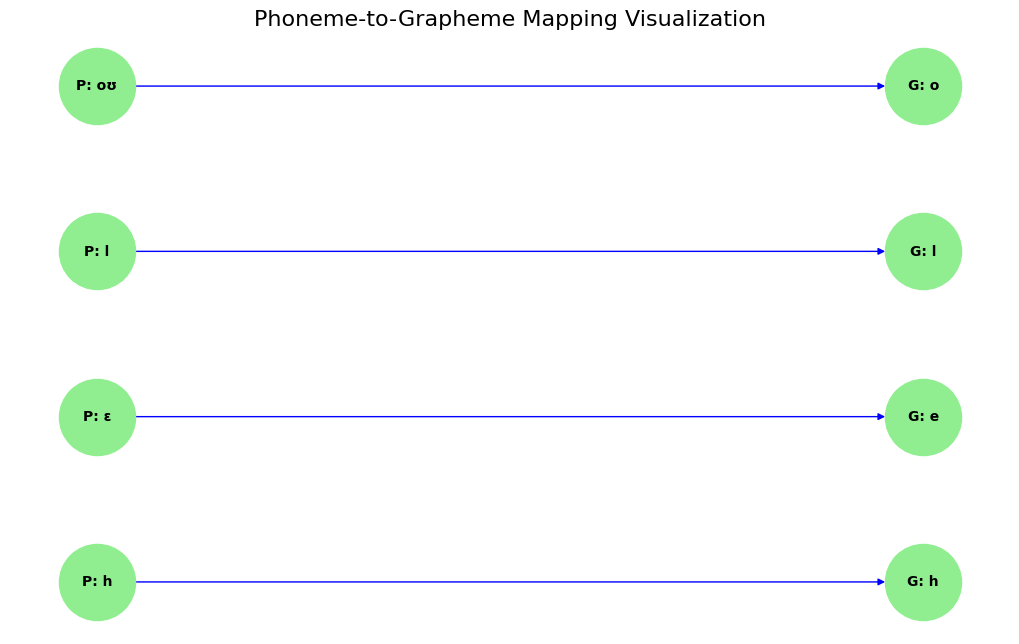

In [11]:
import librosa
import matplotlib.pyplot as plt
import networkx as nx
import speech_recognition as sr

# Step 1: Load the audio file
file_path = "/Users/aditijain/SPEECH VISUALIZATION/harvard.wav"
y, sr_rate = librosa.load(file_path, sr=None)

# Step 2: Convert audio to text (and phonemes)
recognizer = sr.Recognizer()
with sr.AudioFile(file_path) as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)  # Convert audio to text

# For phonemes: Use a pre-trained phoneme recognition library if available
# Here, we use a dummy phoneme mapping for simplicity
phonemes = ["h", "ɛ", "l", "oʊ"]  # Example: for "hello"
graphemes = ["h", "e", "l", "o"]

# Step 3: Create a bipartite graph for phoneme-to-grapheme mapping
G = nx.DiGraph()
phoneme_nodes = [f"P: {p}" for p in phonemes]
grapheme_nodes = [f"G: {g}" for g in graphemes]

# Add edges between corresponding phonemes and graphemes
for p, g in zip(phoneme_nodes, grapheme_nodes):
    G.add_edge(p, g)

# Step 4: Visualize the mapping
plt.figure(figsize=(10, 6))
pos = nx.bipartite_layout(G, phoneme_nodes)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightgreen",
    node_size=3000,
    font_size=10,
    font_weight="bold",
    edge_color="blue",
)
plt.title("Phoneme-to-Grapheme Mapping Visualization", fontsize=16)
plt.show()


In [ ]:
#I actually figured out how to do FFT - and so I will show that here:

In [2]:
pip install jiwer

python(82630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
Note: you may need to restart the kernel to use updated packages.


SyntaxError: incomplete input (3325869598.py, line 7)

In [1]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


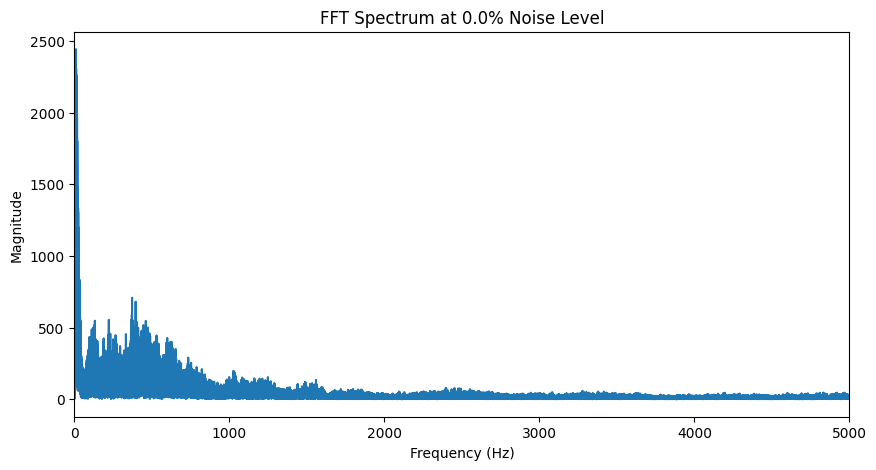

Noise Level: 0.0%
Original STT: does snail smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle tastes fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun 
Noisy STT: the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle tastes fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun
Word Error Rate (WER): 4.65%
Character Error Rate (CER): 2.84%



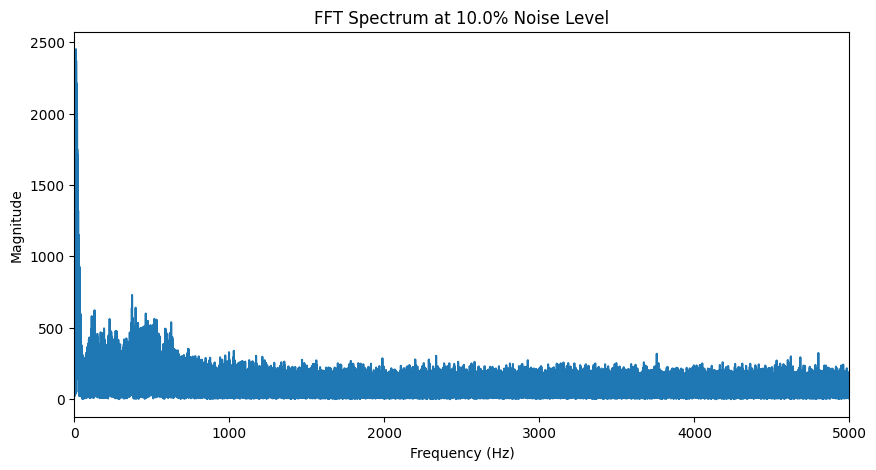

Noise Level: 10.0%
Original STT: does snail smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle tastes fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun 
Noisy STT: does snail smell of cold beer leaders it takes you to bring out the odor a cold bits and stores health and zest a salt pickle is on the plants tacos al pastor are my favorite the vegetable food is the hot cross buns
Word Error Rate (WER): 30.23%
Character Error Rate (CER): 19.43%



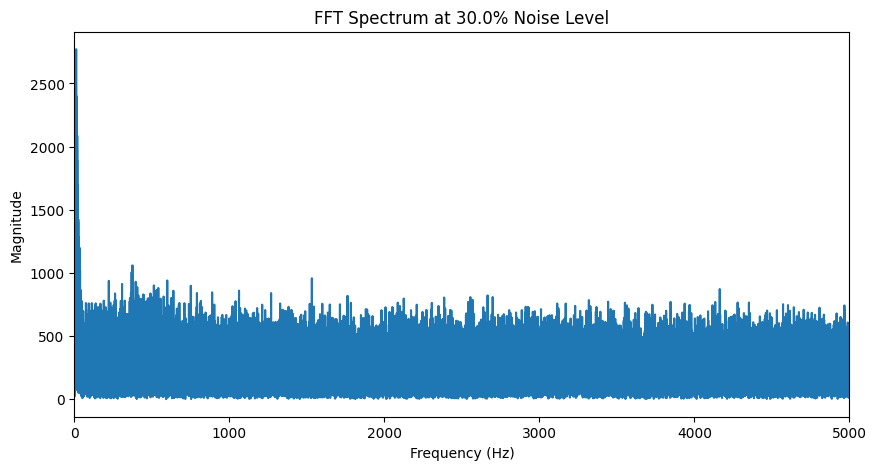

Noise Level: 30.0%
Original STT: does snail smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle tastes fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun 
Noisy STT: is there still smell is your movie it take me to bring up the road it's cold here before it goes back and help you period
Word Error Rate (WER): 88.37%
Character Error Rate (CER): 66.82%



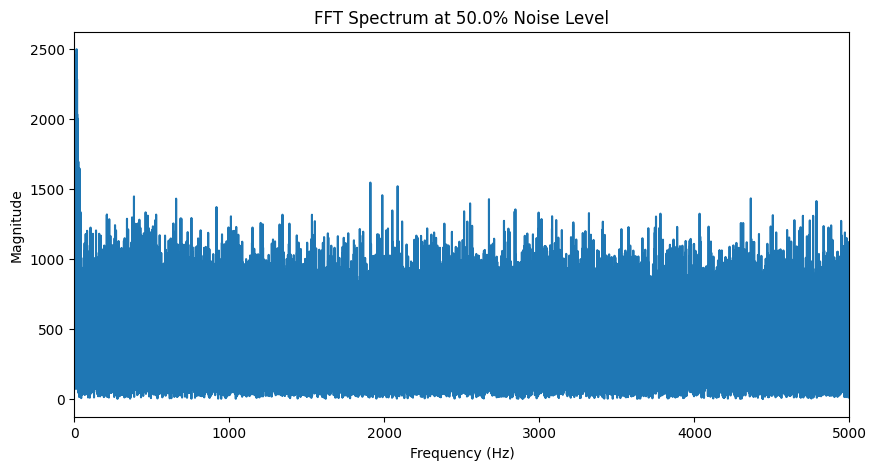

Noise Level: 50.0%
Original STT: does snail smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle tastes fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun 
Noisy STT: is there an alarm for 4:45 p.m. tonight period hey Google
Word Error Rate (WER): 100.00%
Character Error Rate (CER): 82.94%



In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import speech_recognition as sr
from jiwer import wer, cer

# Load an audio file
audio_file = "/Users/aditijain/SPEECH VISUALIZATION/harvard.wav"
y, sample_rate = librosa.load(audio_file, sr=None)  # Renamed 'sr' to 'sample_rate'

# Function to add Gaussian noise
def add_noise(y, noise_level):
    noise = np.random.randn(len(y)) * noise_level
    return y + noise

# Function to compute FFT
def compute_fft(y, sample_rate):
    fft_spectrum = np.fft.fft(y)
    frequencies = np.fft.fftfreq(len(fft_spectrum), d=1/sample_rate)
    return fft_spectrum, frequencies

# Function to plot FFT spectrum
def plot_fft(y, sample_rate, noise_level):
    fft_spectrum, frequencies = compute_fft(y, sample_rate)
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_spectrum[:len(frequencies)//2]))
    plt.title(f"FFT Spectrum at {noise_level*100}% Noise Level")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, 5000)  # Limit frequency range for better visualization
    plt.show()


noise_levels = [0.0, 0.1, 0.3, 0.5]  # 0%, 10%, 30%, 50% noise levels
original_text = "does snail smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle tastes fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun "
for noise_level in noise_levels:
    noisy_y = add_noise(y, noise_level=noise_level)
    
    # Save noisy audio
    noisy_audio_path = f"noisy_speech_{int(noise_level*100)}.wav"
    sf.write(noisy_audio_path, noisy_y, sample_rate)  # Use 'sample_rate' instead of 'sr'

    # Plot FFT Spectrum
    plot_fft(noisy_y, sample_rate, noise_level)
    
    # Transcribe using SpeechRecognition
    recognizer = sr.Recognizer()
    with sr.AudioFile(noisy_audio_path) as source:
        audio_data = recognizer.record(source)
        noisy_text = recognizer.recognize_google(audio_data)  # Convert audio to text
    
    # Compute WER and CER
    wer_score = wer(original_text, noisy_text)
    cer_score = cer(original_text, noisy_text)
    
    print(f"Noise Level: {noise_level*100}%")
    print(f"Original STT: {original_text}")
    print(f"Noisy STT: {noisy_text}")
    
    ##going to hear how the noisy file sounds here
    print(f"Word Error Rate (WER): {wer_score:.2%}")
    print(f"Character Error Rate (CER): {cer_score:.2%}\n")


In [4]:
# Analyzing the results of the data:
# - as the noise distribution is increased, the accuracy of analyzing the speech increases significantly. This experiment is trying to mirror circumstances
# in real life, where background noises will cause issues in detecting speech and converting it to text
# As seen in the Fourier Transform, incresae the noise distribution will make it more difficult for the FFT to actually pick out the important
# frequencies that will be used in the conversion. 


AttributeError: 'int' object has no attribute 'Recognizer'

In [ ]:
sound = AudioSegment.from_wav("/Users/aditijain/SPEECH VISUALIZATION/harvard.wav")
play(sound)

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

##do each one individually so that we can actually hear what this sounds like with the sounds added
noisy_y = add_noise(y, noise_level=0.1)
noisy_audio_path = f"noisy_speech_{int(noise_level*100)}.wav"
sf.write(noisy_audio_path, noisy_y, sample_rate)  # Use 'sample_rate' instead of 'sr'

sound = AudioSegment.from_wav(noisy_audio_path)
play(sound)



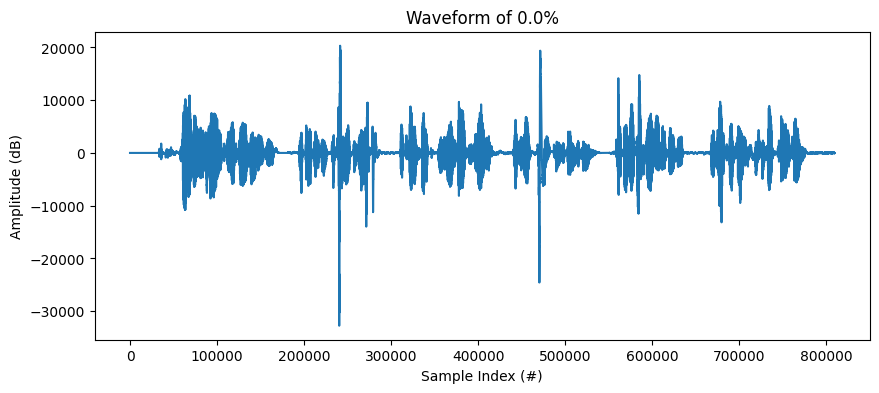

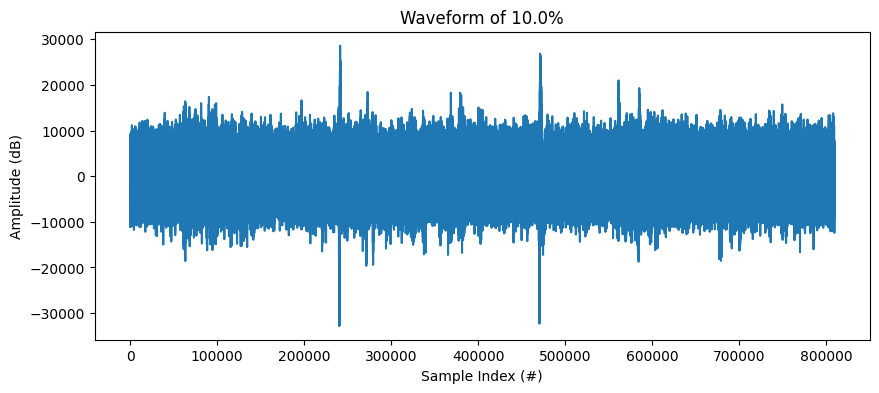

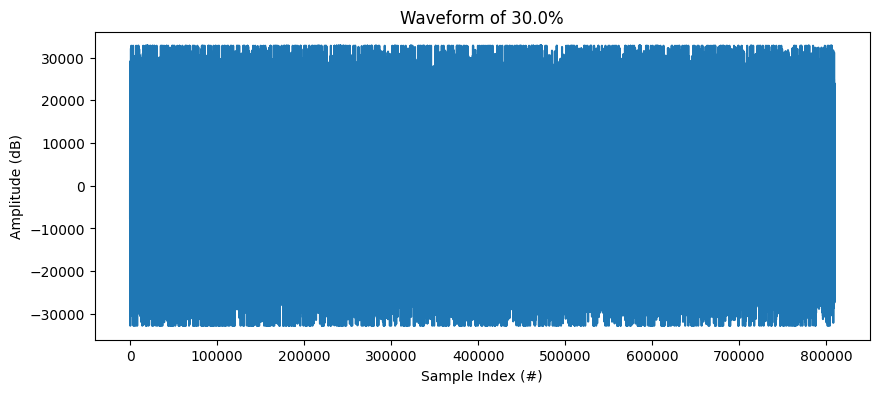

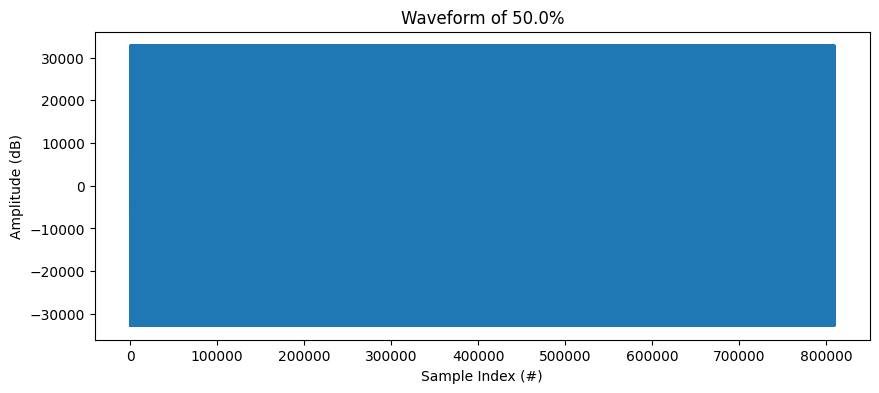

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import speech_recognition as sr
from jiwer import wer, cer
from scipy.io import wavfile
from scipy.signal import spectrogram
import librosa
import librosa.display



# Load an audio file
audio_file = "/Users/aditijain/SPEECH VISUALIZATION/harvard.wav"
y, sample_rate = librosa.load(audio_file, sr=None)  # Renamed 'sr' to 'sample_rate'

# Function to add Gaussian noise
def add_noise(y, noise_level):
    noise = np.random.randn(len(y)) * noise_level
    return y + noise


noise_levels = [0.0, 0.1, 0.3, 0.5]  # 0%, 10%, 30%, 50% noise levels
original_text = "does snail smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle tastes fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun "
for noise_level in noise_levels:
    noisy_y = add_noise(y, noise_level=noise_level)
    
    # Save noisy audio
    noisy_audio_path = f"noisy_speech_{int(noise_level*100)}.wav"
    sampling_rate, audio_data = wavfile.read(noisy_audio_path)

    # Display the waveform
    plt.figure(figsize=(10, 4))
    plt.plot(audio_data)
    plt.title('Waveform of {}%'.format(noise_level*100))
    plt.xlabel('Sample Index (#)')
    plt.ylabel('Amplitude (dB)')
    plt.show()